In [5]:
import os
import re
from preprocess import process_text, make_metafile

import json
from collections import OrderedDict
import numpy as np
import random
from preprocess import process_text, make_metafile, preprocess, seperate_train_val
import matplotlib.pyplot as plt

dir_base = '/home/dhlee/Data/TTS/aihub'

sample_rate = 16000
n_fft = 1024
trim_db = 60

subdir_train = 'train_' + str(sample_rate) + '_' + str(n_fft) 
subdir_test = 'test_' + str(sample_rate) + '_' + str(n_fft) 

dir_train = os.path.join(dir_base, subdir_train)
dir_test = os.path.join(dir_base, subdir_test)


In [2]:
make_metafile(dir_base)

In [2]:
seperate_train_val(os.path.join(dir_base, 'meta.txt'))

In [3]:
preprocess(os.path.join(dir_base, 'train_meta.txt'), dir_base, out_subdir=subdir_train, sample_rate=sample_rate, trim_db=trim_db)

100%|██████████| 498036/498036 [38:58<00:00, 213.00it/s]  


In [2]:
preprocess(os.path.join(dir_base, 'val_meta.txt'), dir_base, out_subdir=subdir_test, sample_rate=sample_rate, trim_db=trim_db)

100%|██████████| 124509/124509 [00:49<00:00, 2505.41it/s]


# Test Dataset

In [2]:
from aihub_dataset import AihubDataset

In [ ]:
ds_train = AihubDataset(os.path.join(dir_base, subdir_train, 'meta.txt'), use_spec=False, use_mel=True)

 48%|████▊     | 238616/498036 [15:36<18:04, 239.24it/s]  

In [ ]:
ds_val = AihubDataset(os.path.join(dir_base, subdir_test, 'meta.txt'), use_spec=False, use_mel=True)

# Check Spectrograms

In [7]:
dir_spec = os.path.join(dir_test, 'spec')
dir_mel = os.path.join(dir_test, 'mel')

In [8]:
filename = 'KsponSpeech_286042'
path_spec = os.path.join(dir_spec, filename + '.spec.npy')
path_mel = os.path.join(dir_mel, filename + '.mel.npy')

In [9]:
spec = np.load(path_spec)
mel = np.load(path_mel)

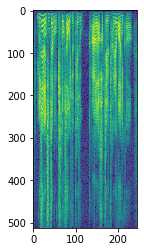

In [10]:
plt.imshow(spec)

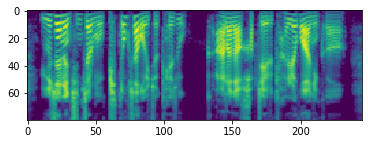

In [11]:
plt.imshow(mel)

In [12]:
mel.shape

(80, 245)